In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/mimic_tissue_experiment.csv')

df_long = df.melt(id_vars=['sample', 'mimic_tissue'], value_vars=['trial1', 'trial2', 'trial3'],
                  var_name='trial', value_name='count').dropna()


/var/folders/s4/9tl_p06528vgmf3960zqdvkh0000gn/T/ipykernel_98249/521718564.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


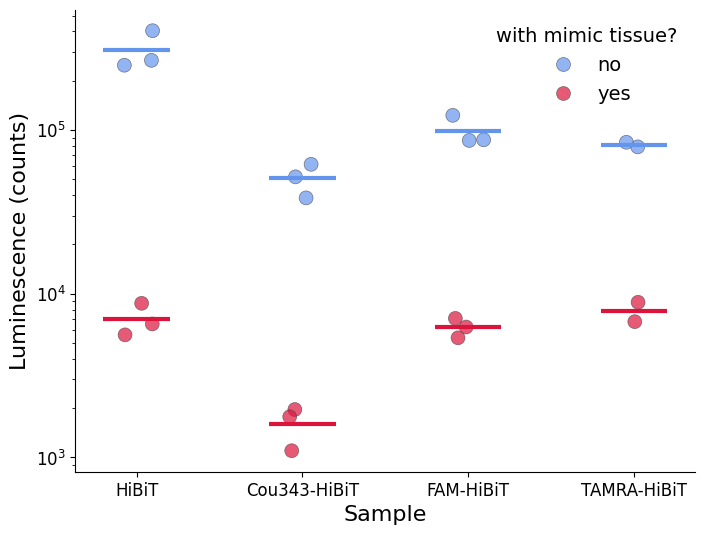

In [3]:
color_map = {'no': 'cornflowerblue', 'yes': 'crimson'}

fig, ax = plt.subplots(figsize=(8, 6))

sns.stripplot(
    data=df_long,
    x='sample',
    y='count',
    hue='mimic_tissue',
    palette=color_map,
    dodge=False,
    jitter=True,
    linewidth=0.5,
    edgecolor='gray',
    alpha=0.7,
    size=10,
    ax=ax
)

# Horizontal mean lines
group_means = df_long.groupby(['sample', 'mimic_tissue'])['count'].mean().reset_index()
sample_order = df_long['sample'].unique()

for i, sample in enumerate(sample_order):
    for j, mimic in enumerate(['no', 'yes']):
        subset = group_means[(group_means['sample'] == sample) & (group_means['mimic_tissue'] == mimic)]
        if not subset.empty:
            y = subset['count'].values[0]
            x_center = i
            ax.hlines(y, x_center - 0.2, x_center + 0.2, color=color_map[mimic], lw=3, zorder=10)

ax.set_yscale('log')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="with mimic tissue?", title_fontsize=14, frameon=False, fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Sample", fontsize=16)
ax.set_ylabel("Luminescence (counts)", fontsize=16)

plt.savefig('../figure/mimic_tissue.pdf', dpi=600)
plt.show()